## INCOME PREDICTION

Classifying income as <=50K and >50k

In [1]:
import numpy as np
import pandas as pd

### DATA

In [2]:
df = pd.read_csv('DATA/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### FEATURE ENGINEERING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [5]:
len(df[df['workclass']=='?'])

1836

In [6]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [7]:
len(df[df['occupation']=='?'])

1843

In [8]:
df.drop(df[df['occupation']=='?'].index, inplace=True)

Dropping the rows where 'occupation'='?' also solves problem with 'workclass'

In [9]:
len(df[df['workclass']=='?'])

0

In [10]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Convert <=50K to 0

          >50K to 1

Convert other categorical features to dummies

In [11]:
df['income'] = df['income'].apply(lambda x: 1 if x==">50K" else 0)
df = pd.get_dummies(df, drop_first=True)
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


##### Correlations


In [12]:
df.corr()['income'].sort_values()

marital.status_Never-married        -0.319865
relationship_Own-child              -0.225337
relationship_Not-in-family          -0.193297
occupation_Other-service            -0.166290
relationship_Unmarried              -0.146087
                                       ...   
hours.per.week                       0.228547
age                                  0.242431
education.num                        0.334640
marital.status_Married-civ-spouse    0.445122
income                               1.000000
Name: income, Length: 98, dtype: float64

Remove features which have less than 0.01 correlation with 'income'

In [13]:
correlated = df.corr()['income']
df.drop(correlated[correlated.values < 0.01].index, axis=1, inplace=True)
df

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native.country_England,native.country_France,native.country_Germany,native.country_India,native.country_Iran,native.country_Italy,native.country_Japan,native.country_Philippines,native.country_Taiwan,native.country_United-States
1,82,9,0,4356,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,54,4,0,3900,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,10,0,3900,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,34,9,0,3770,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,38,6,0,3770,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32557,27,12,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,40,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### PREPARING THE DATA

In [14]:
X = df.drop('income', axis=1)
y = df['income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### GRID SEARCH TO FIND BEST MODEL

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy', 'log_loss']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(tree, params)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy'}

#### PERFORMANCE EVALUATION

In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

##### TRAIN DATA

In [17]:
train_y_pred = grid.predict(X_train)
print(classification_report(y_train, train_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18468
           1       0.98      0.87      0.92      6106

    accuracy                           0.96     24574
   macro avg       0.97      0.93      0.95     24574
weighted avg       0.96      0.96      0.96     24574



##### TEST DATA

In [18]:
test_y_pred = grid.predict(X_test)
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4600
           1       0.66      0.62      0.64      1544

    accuracy                           0.83      6144
   macro avg       0.77      0.76      0.76      6144
weighted avg       0.82      0.83      0.82      6144



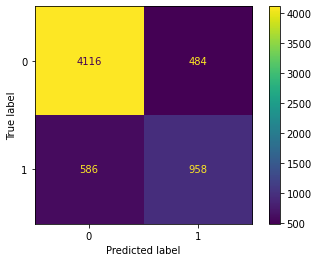

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, test_y_pred)